In [1]:
# Logic Operator
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

# derivative of Sigmoid function for backprop.
def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y, N):
        self.input    = x
        self.neuron   = N
        self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
        self.weights2 = np.random.rand(self.neuron, 1)
        # output
        self.y        = y
        self.output   = np.zeros(self.y.shape)
        # N neurons connected to instantiating the output
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
    
    def backprop(self):
    # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T,
                            (2*(self.y - self.output)
                            * sigmoid_derivative(self.output)))
        
        d_weights1 = np.dot(self.input.T,
                            (np.dot(2*(self.y - self.output)
                            * sigmoid_derivative(self.output),
                            self.weights2.T) * sigmoid_derivative(self.layer1)))
        # weights updating
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    
iterations = 10
n_unit = 1
    
if __name__ == "__main__":
    Input = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]])
    Target = np.array([[0],[0],[0],[1]])
    model = NeuralNetwork(Input, Target, n_unit)
    SSD = []
    
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors))
        
    Itr = np.linspace(1,len(SSD),len(SSD))
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')
    # Objective(loss) function
    print("The target values are:", Target)
    print("The predicted values are:", model.output)
            

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[0.30723286]
 [0.28470396]
 [0.3062347 ]
 [0.28396796]]


## Task 1

If you run the code several times, will you observe the same results? Why?

Answer: The same result won't be obtained because the weights are initialized randomly.

### Keep the parameter “n_unit=1” and increase the number of iterations starting from 10, 50, 100, 500, 2000, and compare the loss values. 

Training with num iteration 10


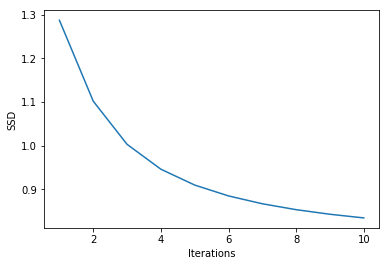

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[0.36521637]
 [0.33077829]
 [0.32918264]
 [0.30486134]]
Training with num iteration 50


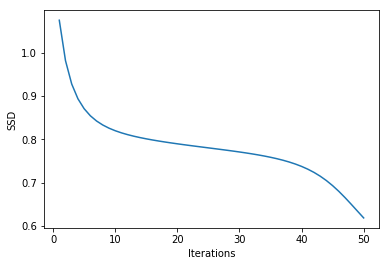

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[0.21068531]
 [0.26574656]
 [0.27327557]
 [0.34544202]]
Training with num iteration 100


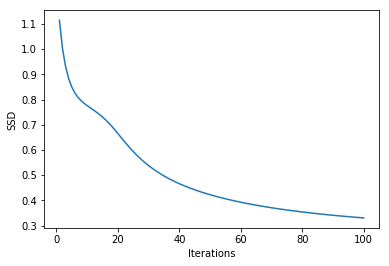

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[0.01621926]
 [0.12914562]
 [0.1290604 ]
 [0.4554065 ]]
Training with num iteration 500


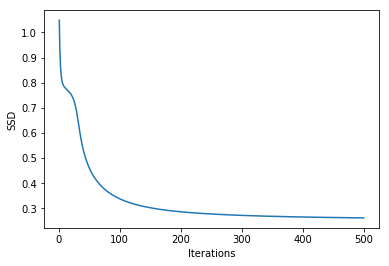

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[0.001844  ]
 [0.04317066]
 [0.04317065]
 [0.49172438]]
Training with num iteration 2000


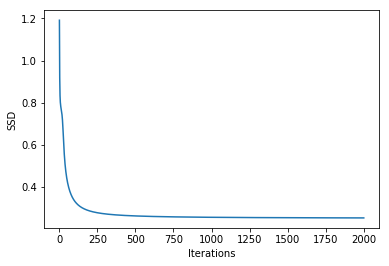

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[4.58252944e-04]
 [1.83596314e-02]
 [1.83596314e-02]
 [4.98116557e-01]]


In [2]:
    n_iter = np.array([10, 50, 100, 500, 2000])
    
    for n in n_iter:
        model = NeuralNetwork(Input, Target, n_unit)
        SSD = []
        print("Training with num iteration", n)
        for i in range(n):
            model.feedforward()
            model.backprop()
            errors = (Target - model.output)**2
            SSD.append(np.sum(errors))
        
        Itr = np.linspace(1,len(SSD),len(SSD))
        plt.plot(Itr, SSD)
        plt.xlabel('Iterations')
        plt.ylabel('SSD')
        plt.show()
        # Objective(loss) function
        print("The target values are:", Target)
        print("The predicted values are:", model.output)
        

What can you conclude from increasing the number of iterations?

A: The network seems to converge only after a few hundret epochs. So using a smaller numer of iterations would cause the network to not converge properly and thus would not yield the optimal performance. However, if you use 2000 epochs, the network seems to have converged after 500 epochs already, so the difference in performance is negligible. The optimal trade-off between runtime and performance seems to be at around 500 epochs in this case.

### Now, with a fixed value of “iterations = 1000”, increase the parameter “n_unit” to 2, 5, 10 and interpret the results.

Training with num neurons 2


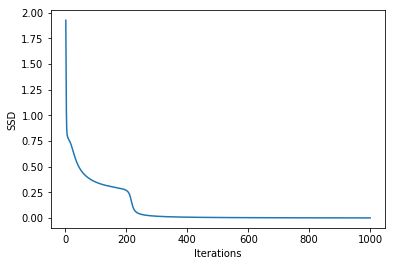

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[0.00353618]
 [0.02204385]
 [0.01868348]
 [0.96546349]]
Training with num neurons 5


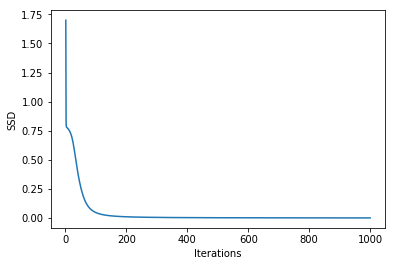

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[5.39395345e-05]
 [1.43803543e-02]
 [1.46317796e-02]
 [9.76505494e-01]]
Training with num neurons 10


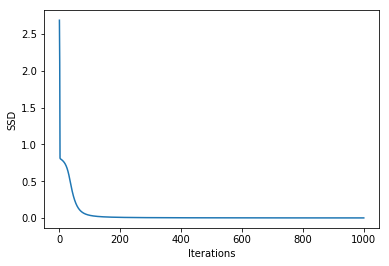

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[6.74712217e-05]
 [1.47329557e-02]
 [1.43121484e-02]
 [9.80083006e-01]]


In [3]:
    n_unit_var = np.array([2, 5, 10])
    iterations = 1000
    
    for n in n_unit_var:
        model = NeuralNetwork(Input, Target, n)
        SSD = []
        print("Training with num neurons", n)
        for i in range(iterations):
            model.feedforward()
            model.backprop()
            errors = (Target - model.output)**2
            SSD.append(np.sum(errors))
        
        Itr = np.linspace(1,len(SSD),len(SSD))
        plt.plot(Itr, SSD)
        plt.xlabel('Iterations')
        plt.ylabel('SSD')
        plt.show()
        # Objective(loss) function
        print("The target values are:", Target)
        print("The predicted values are:", model.output)

A: n_unit is the number of neurons in the network. The shape and SSE of the trained network is the same, however, the error in the first epoch is higher for a higher number of neurons. The task at hand seems to be simple enough to model with 2 neurons already. The network performs the AND operation perfectly. In the previous task, the network failed to perform the AND operation perfectly. The problem might be too complex to model with just one neuron. 

## Task 2: 

Repeat task1 for XOR logic operator. For fixed values of parameters (iterations=2000, and n_unit=1), which of the AND or XOR operators has lower loss values? Why?

Training with num neurons 1


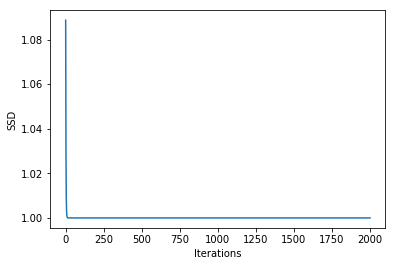

The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.50002806]
 [0.50002822]
 [0.50002895]
 [0.5000291 ]]


In [4]:
iterations = 2000
n_unit_var = np.array([1])

Input = np.array([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]])
Target = np.array([[0],[1],[1],[0]])

for n in n_unit_var:
    model = NeuralNetwork(Input, Target, n)
    SSD = []
    print("Training with num neurons", n)
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors))

    Itr = np.linspace(1,len(SSD),len(SSD))
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')
    plt.show()
    # Objective(loss) function
    print("The target values are:", Target)
    print("The predicted values are:", model.output)

#### For fixed values of parameters (iterations=2000, and n_unit=1), which of the AND or XOR operators has lower loss values? Why?

For 1 neuton, the AND operator has the lower loss value. For the AND operator, there is a direct relation between either of the input values and the output (output is 0 if one of the inputs is zero). Thus, the proble might be easier to train. 

###  Increase the number of neurons in the hidden layer (n_unit) to 2, 5, 10, 50.

Training with num neurons 2


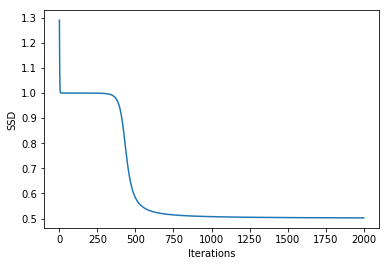

The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.02046992]
 [0.49926011]
 [0.97940944]
 [0.50085461]]
Training with num neurons 5


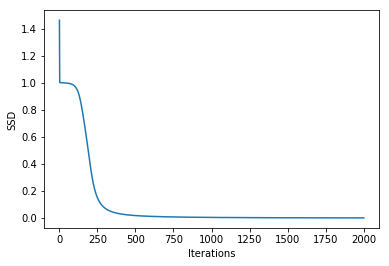

The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.01068497]
 [0.97576236]
 [0.98184308]
 [0.02469245]]
Training with num neurons 10


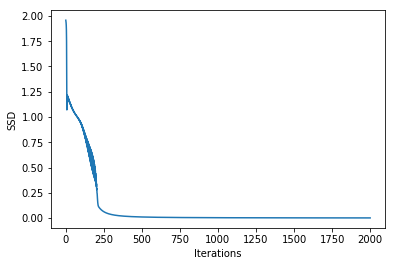

The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.01863504]
 [0.9831473 ]
 [0.98340754]
 [0.01797495]]
Training with num neurons 50


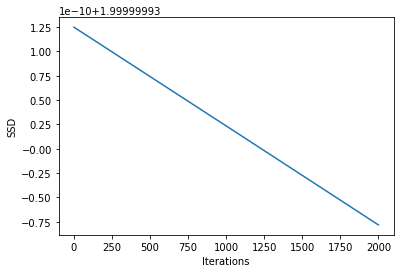

The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.99999997]
 [1.        ]
 [1.        ]
 [1.        ]]


In [5]:
iterations = 2000
n_unit_var = np.array([2, 5, 10, 50])

Input = np.array([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]])
Target = np.array([[0],[1],[1],[0]])

for n in n_unit_var:
    model = NeuralNetwork(Input, Target, n)
    SSD = []
    print("Training with num neurons", n)
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors))

    Itr = np.linspace(1,len(SSD),len(SSD))
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')
    plt.show()
    # Objective(loss) function
    print("The target values are:", Target)
    print("The predicted values are:", model.output)

 ### Does increasing the number of neurons improve the results? Why?
A: 2 neurons seem to be enough in order to achieve an error of around 0. However, if the number of neurons is too large (e.g. in the 50 neuron case), the network doesn't converge. The dataset seems to small to optimize a network this advanced. 

## Task 3
### In the above code, change the parameter “n_unit” as 1, 10 and interpret the observed results.

In [6]:
# Logic operator with Tensorflow Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
Input = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Target = np.array([[0],[1],[1],[0]], "float32")

n_unit_values = np.array([1,10])
for n_unit in n_unit_values:
    print("Test code with n_unit: ", n_unit)
    model = Sequential()
    model.add(Dense(n_unit, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error',
                  optimizer = SGD(lr = 0.01),
                  metrics=['binary_accuracy'])
    model.fit(Input, Target, epochs = 2000, verbose=0)
    print("The predicted class labels are:", model.predict(Input))

Test code with n_unit:  1
The predicted class labels are: [[0.5]
 [0.5]
 [0.5]
 [0.5]]
Test code with n_unit:  10
The predicted class labels are: [[0.4461865 ]
 [0.762746  ]
 [0.53208256]
 [0.30612898]]


### interpret the observed results.
The logical operator XOR cannot be modelled with one neuron, as you'd need two lines to seperate it in the feature space. Thus, the network fails to predict the correct outcome. 

For a network with 10 neurons, the predictions are not very accurate either, but they values that are supposed to be 0 are below 0.5 and the values that are supposed to be 1 are above 0.5. Thus, one could add a simple thresholding to get a perfect prediction. 


# Multilayer Perceptron for Image Classification

## Task 4
### Review the following data loader code and find out how it works. Run it to load the training and test data.

In [20]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize


def gen_labels(im_name, pat1, pat2):
    '''
    Parameters
    ----------
    im_name : Str
    The image file name.
    pat1 : Str
    A string pattern in the filename for 1st class, e.g "Mel"
    pat2 : Str
    A string pattern in the filename 2nd class, e.g, "Nev"
    Returns
    -------
    Label : Numpy array
    Class label of the filename name based on its pattern.
    '''
    if pat1 in im_name:
        label = np.array([0])
    elif pat2 in im_name:
        label = np.array([1])
    return label

def get_data(data_path, data_list, img_h, img_w):
    """
    Parameters
    ----------
    train_data_path : Str
    Path to the data directory
    train_list : List
    A list containing the name of the images.
    img_h : Int
    image height to be resized to.
    img_w : Int
    image width to be resized to.
    Returns
    -------
    img_labels : Nested List
    A nested list containing the loaded images along with their
    correcponding labels.
    """
    img_labels = []
    for item in enumerate(data_list):
        img = imread(os.path.join(data_path, item[1]), as_gray = True) # "as_grey"
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        img_labels.append([np.array(img), gen_labels(item[1], 'Mel', 'Nev')])
        if item[0] % 100 == 0:
            print('Reading: {0}/{1} of train images'.format(item[0], len(data_list)))
        
    shuffle(img_labels)
    return img_labels

def get_data_arrays(nested_list, img_h, img_w):
    """
    Parameters
    ----------
    nested_list : nested list
    nested list of image arrays with corresponding class labels.
    img_h : Int
    Image height.
    img_w : Int
    Image width.

    Returns
    -------
    img_arrays : Numpy array
    4D Array with the size of (n_data,img_h,img_w, 1)
    label_arrays : Numpy array
    1D array with the size (n_data).
    """
    img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
    label_arrays = np.zeros((len(nested_list)), dtype = np.int32)
    
    for ind in range(len(nested_list)):
        img_arrays[ind] = nested_list[ind][0]
        label_arrays[ind] = nested_list[ind][1]
    
    img_arrays = np.expand_dims(img_arrays, axis =3)    
    return img_arrays, label_arrays

def get_train_test_arrays(train_data_path, test_data_path, train_list,
                          test_list, img_h, img_w):
    """
    Get the directory to the train and test sets, the files names and
    the size of the image and return the image and label arrays for
    train and test sets.
    """
    train_data = get_data(train_data_path, train_list, img_h, img_w)
    test_data = get_data(test_data_path, test_list, img_h, img_w)
    train_img, train_label = get_data_arrays(train_data, img_h, img_w)
    test_img, test_label = get_data_arrays(test_data, img_h, img_w)
    del(train_data)
    del(test_data)
    return train_img, test_img, train_label, test_label

img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = '/DL_course_data/Lab1/Skin/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)
x_train, x_test, y_train, y_test = get_train_test_arrays(train_data_path, test_data_path, train_list,
                                                         test_list, img_h, img_w)

Reading: 0/1000 of train images
Reading: 100/1000 of train images
Reading: 200/1000 of train images
Reading: 300/1000 of train images
Reading: 400/1000 of train images
Reading: 500/1000 of train images
Reading: 600/1000 of train images
Reading: 700/1000 of train images
Reading: 800/1000 of train images
Reading: 900/1000 of train images
Reading: 0/200 of train images
Reading: 100/200 of train images


#### Develop a 4-layers MLP. If you call the number of neurons in the first fully-connected layer as “base_dense”, this 4-layers MLP should contain “base_dense”, “base_dense//2”, and “base_dense//4” as the number of neurons in the first 3 layers respectively. The activation function of all those neurons should set as “Relu”. However, in the last layer (4th layer), choose a proper number of neurons as well as activation function(s) that fit the binary classification task. Develop your model as a function, and remember to, first, import all the required layers/tools from tensorflow.


In [121]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model



def model(img_width, img_height, img_ch, base_dense):
    """
    Functional API model.
    name the last layer as "out"; e.g., out = ....
    """
    input_size = (img_width, img_height, img_ch)
    inputs_layer = Input(shape=input_size, name='input_layer')
    # TODO
    flatten_layer = Flatten()(inputs_layer)
    dense_layer_1 = Dense(base_dense, name='dense_layer_1', activation="relu")(flatten_layer)
    dense_layer_2 = Dense(base_dense//2, name='dense_layer_2', activation="relu")(dense_layer_1)
    dense_layer_3 = Dense(base_dense//4, name='dense_layer_3', activation="relu")(dense_layer_2)
    out = Dense(1, name='out', activation="sigmoid")(dense_layer_3)
    
    clf = Model(inputs=inputs_layer, outputs=out)
    clf.summary()
    return clf

 #### Then compile the model by setting ‘binary cross entropy’ as loss function and ‘binary accuracy’ as evaluation metric and train the model for the following parameters: n_epochs = 50, Batch_Size = 16, base_dense = 64, LR = 0.0001 by using “clf_hist = clf.fit(...)”

In [148]:
n_epochs = 50 
Batch_Size = 16
base_dense = 64
LR = 0.0001 

model1 = model(128, 128, 1, base_dense)
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
               loss=[tf.keras.losses.BinaryCrossentropy()],
               metrics=[tf.keras.metrics.BinaryAccuracy()])
model1_hist = model1.fit(
        x=x_train,
        y=y_train,
        batch_size=Batch_Size,
        epochs=n_epochs,
        verbose=1
)



Model: "model_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 128, 128, 1)]     0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 64)                1048640   
_________________________________________________________________
dense_layer_2 (Dense)        (None, 32)                2080      
_________________________________________________________________
dense_layer_3 (Dense)        (None, 16)                528       
_________________________________________________________________
out (Dense)                  (None, 1)                 17        
Total params: 1,051,265
Trainable params: 1,051,265
Non-trainable params: 0
________________________________________________

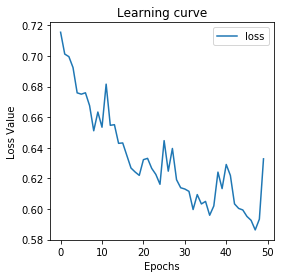

In [149]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(model1_hist.history["loss"], label="loss") #loss is training loss
#plt.plot(model1_hist.history["val_loss"], label="val_loss") #val_loss is validation loss
#plt.plot(np.argmin(model1_hist.history["val_loss"]),
#np.min(model1_hist.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")

plt.legend();

### How do you interpret the observed values of loss and accuracy values? Is the number of epochs enough to make a good decision about model performance? 

The accuracy after the final epoch is 0.638, which is barely more than 50% which would be the performance if the network would decide the outcome randomly. Furthermore, by looking at the loss values in the learning curve, one can see, that the model is not converged. Therefore, the number of epochs is likely too low. 

### For the same number of epochs, reduce the learning rate parameter to 0.1 and interpret the results.


Model: "model_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 128, 128, 1)]     0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 64)                1048640   
_________________________________________________________________
dense_layer_2 (Dense)        (None, 32)                2080      
_________________________________________________________________
dense_layer_3 (Dense)        (None, 16)                528       
_________________________________________________________________
out (Dense)                  (None, 1)                 17        
Total params: 1,051,265
Trainable params: 1,051,265
Non-trainable params: 0
________________________________________________

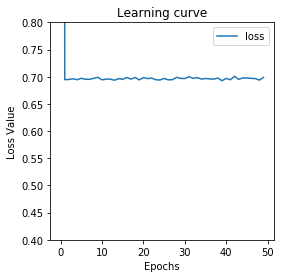

In [152]:
n_epochs = 50 
Batch_Size = 16
base_dense = 64
LR = 0.1 

model1 = model(128, 128, 1, base_dense)
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
               loss=[tf.keras.losses.BinaryCrossentropy()],
               metrics=[tf.keras.metrics.BinaryAccuracy()])
model1_hist = model1.fit(
        x=x_train,
        y=y_train,
        batch_size=Batch_Size,
        epochs=n_epochs,
        verbose=1
)

#visualize results

plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(model1_hist.history["loss"], label="loss") #loss is training loss
#plt.plot(model1_hist.history["val_loss"], label="val_loss") #val_loss is validation loss
#plt.plot(np.argmin(model1_hist.history["val_loss"]),
#np.min(model1_hist.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.ylim((0.4,0.8))

plt.legend();

### For the same number of epochs, reduce the learning rate parameter to 0.1 and interpret the results.
The model does not converge i.e. learn to classify the images. The accuracy is oscillating around 0.5 which is as accurate as classifying by chance. Thus, the learning rate is too high. 

### Now increase the number of epochs to 150 with LR=0.0001. Does this model have enough capacity to yield acceptable results? 

Model: "model_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 128, 128, 1)]     0         
_________________________________________________________________
flatten_36 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 64)                1048640   
_________________________________________________________________
dense_layer_2 (Dense)        (None, 32)                2080      
_________________________________________________________________
dense_layer_3 (Dense)        (None, 16)                528       
_________________________________________________________________
out (Dense)                  (None, 1)                 17        
Total params: 1,051,265
Trainable params: 1,051,265
Non-trainable params: 0
________________________________________________

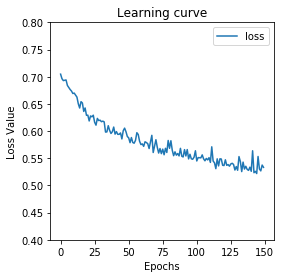

In [153]:
n_epochs = 150 
Batch_Size = 16
base_dense = 64
LR = 0.0001 

model1 = model(128, 128, 1, base_dense)
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
               loss=[tf.keras.losses.BinaryCrossentropy()],
               metrics=[tf.keras.metrics.BinaryAccuracy()])
model1_hist = model1.fit(
        x=x_train,
        y=y_train,
        batch_size=Batch_Size,
        epochs=n_epochs,
        verbose=1
)

#visualize results

plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(model1_hist.history["loss"], label="loss") #loss is training loss
#plt.plot(model1_hist.history["val_loss"], label="val_loss") #val_loss is validation loss
#plt.plot(np.argmin(model1_hist.history["val_loss"]),
#np.min(model1_hist.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.ylim((0.4,0.8))

plt.legend();

### Does this model have enough capacity to yield acceptable results?

The accuracy increased to 73% yet the learning curve looks like the model has not proberly converged. 

### Increase the “base_dense” parameter to 256 and compare the results with the case of “base_dense=64”. Is increasing the model capacity helpful to improve the model performance? Why?

Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 128, 128, 1)]     0         
_________________________________________________________________
flatten_40 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 256)               4194560   
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               32896     
_________________________________________________________________
dense_layer_3 (Dense)        (None, 64)                8256      
_________________________________________________________________
out (Dense)                  (None, 1)                 65        
Total params: 4,235,777
Trainable params: 4,235,777
Non-trainable params: 0
________________________________________________

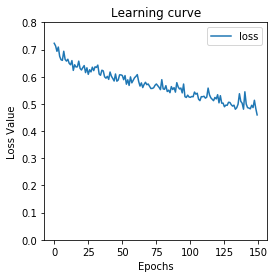

In [157]:
n_epochs = 150 
Batch_Size = 16
base_dense = 256
LR = 0.0001 

model1 = model(128, 128, 1, base_dense)
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
               loss=[tf.keras.losses.BinaryCrossentropy()],
               metrics=[tf.keras.metrics.BinaryAccuracy()])
model1_hist = model1.fit(
        x=x_train,
        y=y_train,
        batch_size=Batch_Size,
        epochs=n_epochs,
        verbose=1
)

#visualize results

plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(model1_hist.history["loss"], label="loss") #loss is training loss
#plt.plot(model1_hist.history["val_loss"], label="val_loss") #val_loss is validation loss
#plt.plot(np.argmin(model1_hist.history["val_loss"]),
#np.min(model1_hist.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.ylim((0,0.8))

plt.legend();

### Compare the results with the case of “base_dense=64”. Is increasing the model capacity helpful to improve the model performance? Why?

Compared to the model with a bense_dense of 64, the model with a base_dense=256 has around 4 times the number of parameters but only improves 0.04 in accuracy. However, when looking at the learning curve, one can see that the slope at the final epoch is steeper in the model with base_dense=256, indicating, that it would further improve and outperform the other model, when increasing the number of epoch in both models. An increase in model capacity thus seems to be helpful in order to improve the classification performance of the model, because it can model a more complicated function. 

## 5 Convolutional Neural Network



In [209]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten

epochs = 20
batch_size = 8
base = 32
learning_rate = 0.00001

def model(img_ch, img_width, img_height):
    model = Sequential()
    model.add(Conv2D(base, kernel_size = (3, 3), activation='relu',
                    strides=1, padding='same',
                    input_shape = (img_width, img_height, img_ch)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(base*2, kernel_size = (3, 3), activation='relu',
                         strides=1, padding='same'))
        
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(base*2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model

In [217]:
# compile model 
model_conv = model(1, 128, 128)
model_conv.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
               loss=[tf.keras.losses.BinaryCrossentropy()],
               metrics=[tf.keras.metrics.BinaryAccuracy()])
model_conv_hist = model_conv.fit(
        x=x_train,
        y=y_train,
        validation_split=0.1,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1
)



Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_48 (Flatten)         (None, 65536)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4194368   
_________________________________________________________________
dense_19 (Dense)             (None, 1)               

dict_keys(['val_loss', 'loss', 'val_binary_accuracy', 'binary_accuracy'])
Training accuracy 0.68666667
Validation accuracy 0.7


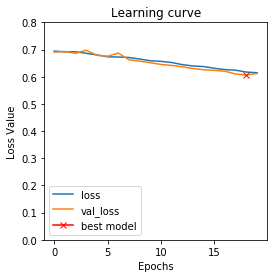

In [218]:
#visualize results

plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(model_conv_hist.history["loss"], label="loss") #loss is training loss
plt.plot(model_conv_hist.history["val_loss"], label="val_loss") #val_loss is validation loss
plt.plot(np.argmin(model_conv_hist.history["val_loss"]),
np.min(model_conv_hist.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.ylim((0,0.8))

plt.legend();
print(model_conv_hist.history.keys())
print("Training accuracy", model_conv_hist.history["binary_accuracy"][-1])
print("Validation accuracy", model_conv_hist.history["val_binary_accuracy"][-1])

### What are the value training and validation accuracies?

Training accuracy 0.68666667
Validation accuracy 0.7

### What can you infer from the learning curves? 
The model did not converge so far. The slope is not very steep. Which indicated that the model converges very slowly. There seems to be no big difference in accutacy and loss between the trainnig and validation. It can be inferred that the training should be performed using more epochs or that the learning rate should be increased.

### Is it reasonable to make a decision based on this set-up of the parameters?
It is not reasonable to make predictions based on this model, as the model has not yet converged and thus not reached its full potential. 


## Task5B) Leave all the parameters from the previous task unchanged except for the n_epoch = 200. Compare the results with task 5A.

In [219]:
model_conv_hist_nepoch_200 = model_conv.fit(
        x=x_train,
        y=y_train,
        validation_split=0.1,
        batch_size=batch_size,
        epochs=200,
        verbose=1
)

Train on 900 samples, validate on 100 samples
Epoch 1/200
900/900 [==============================] - 1s 693us/sample - loss: 0.6093 - binary_accuracy: 0.7078 - val_loss: 0.6034 - val_binary_accuracy: 0.6900
Epoch 2/200
900/900 [==============================] - 1s 678us/sample - loss: 0.6012 - binary_accuracy: 0.7056 - val_loss: 0.5921 - val_binary_accuracy: 0.7800
Epoch 3/200
900/900 [==============================] - 1s 675us/sample - loss: 0.6041 - binary_accuracy: 0.6978 - val_loss: 0.5873 - val_binary_accuracy: 0.7700
Epoch 4/200
900/900 [==============================] - 1s 669us/sample - loss: 0.6014 - binary_accuracy: 0.6956 - val_loss: 0.5841 - val_binary_accuracy: 0.7700
Epoch 5/200
900/900 [==============================] - 1s 674us/sample - loss: 0.5970 - binary_accuracy: 0.7133 - val_loss: 0.5842 - val_binary_accuracy: 0.7200
Epoch 6/200
900/900 [==============================] - 1s 682us/sample - loss: 0.5980 - binary_accuracy: 0.6967 - val_loss: 0.5850 - val_binary_accur

dict_keys(['val_loss', 'loss', 'val_binary_accuracy', 'binary_accuracy'])
Training accuracy 0.84555554
Validation accuracy 0.77


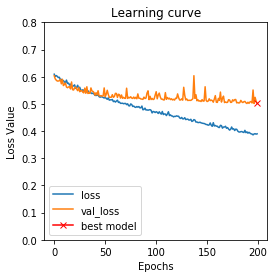

In [220]:
#visualize results

plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(model_conv_hist_nepoch_200.history["loss"], label="loss") #loss is training loss
plt.plot(model_conv_hist_nepoch_200.history["val_loss"], label="val_loss") #val_loss is validation loss
plt.plot(np.argmin(model_conv_hist_nepoch_200.history["val_loss"]),
np.min(model_conv_hist_nepoch_200.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.ylim((0,0.8))

plt.legend();
print(model_conv_hist_nepoch_200.history.keys())
print("Training accuracy", model_conv_hist_nepoch_200.history["binary_accuracy"][-1])
print("Validation accuracy", model_conv_hist_nepoch_200.history["val_binary_accuracy"][-1])

##### Compare the results with task 5A.

Compared to task 5A, there is a substantal difference between the validation loss and the training loss, indicating that the model is overfitted. Furthermore, it can be seen that the steepness of the slope of the validation loss decreased with the number of epochs and is almost flat in the final epochs, when training with 200 epochs. The slope of the training curve does not change much, though. The training accuracy and the validation accuracy both improved compared to task 5b.

## Task5C) Keep all parameters from the last step except for the LR = 0.0001 . Run the experiment with new LR and interpret the results. How do you evaluate the generalization power of the model? What are the values of training and validation accuracies?

In [223]:
new_LR = 0.0001

model_5c = model(1, 128, 128)
model_5c.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=new_LR),
               loss=[tf.keras.losses.BinaryCrossentropy()],
               metrics=[tf.keras.metrics.BinaryAccuracy()])

model_5c_hist = model_5c.fit(
        x=x_train,
        y=y_train,
        validation_split=0.1,
        batch_size=batch_size,
        epochs=200,
        verbose=1
)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 65536)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4194368   
_________________________________________________________________
dense_23 (Dense)             (None, 1)               

dict_keys(['val_loss', 'loss', 'val_binary_accuracy', 'binary_accuracy'])
Training accuracy 1.0
Validation accuracy 0.77


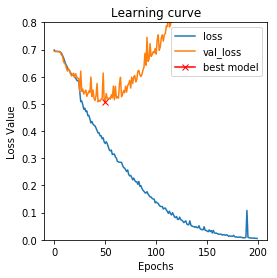

In [224]:
#visualize results

plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(model_5c_hist.history["loss"], label="loss") #loss is training loss
plt.plot(model_5c_hist.history["val_loss"], label="val_loss") #val_loss is validation loss
plt.plot(np.argmin(model_5c_hist.history["val_loss"]),
np.min(model_5c_hist.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.ylim((0,0.8))

plt.legend();
print(model_5c_hist.history.keys())
print("Training accuracy", model_5c_hist.history["binary_accuracy"][-1])
print("Validation accuracy", model_5c_hist.history["val_binary_accuracy"][-1])

### How do you evaluate the generalization power of the model? What are the values of training and validation accuracies?

The generalization power of the model is very bad, as it perfectly classifies the training images but only correctly classifies 77% of the validation images. Furthermore, by looking at the learning curve, it is observable that the validation loss increases with the number of epochs while the training loss converges to 0, indicating that the model is overfitted.

Training accuracy 1.0,
Validation accuracy 0.77

## Task5D) What is the role of the first two convolutional layers?

The first two convolutional layers are used for edge detection and feature detection. 

## Task5E) What is the role of the last two dense layers?
The last two dense layers make up the classifier of the network, that make predictions based on the featuremaps from the convolutional layers. 

## Task5F) What is the major difference between the LeNet and MLP?

LeNet is a convolutional neural networkm while the MLP is a fully connected neural network. 

## Task5G) Look at the last layer of the network. How should we choose the number of neurons and the activation function of the last layer?

In a binary classification, the output has one neuron, while for multiclass classifications the number of output neurons is equal to the number of classes. 

For a binary classification, one uses sigmoid activation function, while for a multiclass classification, one would use a softmax activation function.